# Rede Neural Convolucional com Dataset CIFAR-10

## Importação de bibliotecas necessárias

In [ ]:
#Importando libs essenciais
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras_cv.layers import Grayscale
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import BatchNormalization
from keras.layers  import Dropout
from keras.preprocessing.image import ImageDataGenerator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.2 MB/s eta 0:00:00
Using TensorFlow backend


## Separando dados para treinamentos

### Leitura de dataset

In [ ]:
#Separando dados para treinamentos
seed = 10
np.random.seed(seed)
(X_treinamento, y_treinamento),(X_teste, y_teste) =  cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


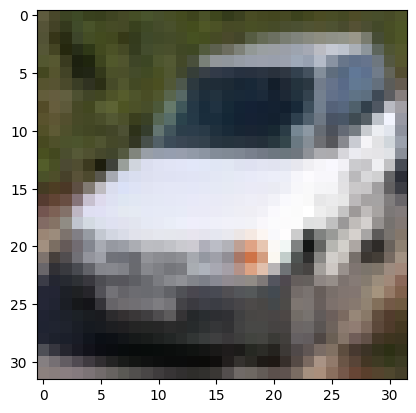

In [ ]:
#Mostrando imagem
plt.imshow(X_treinamento[46])

### Conversão das imagens em escala de cinza

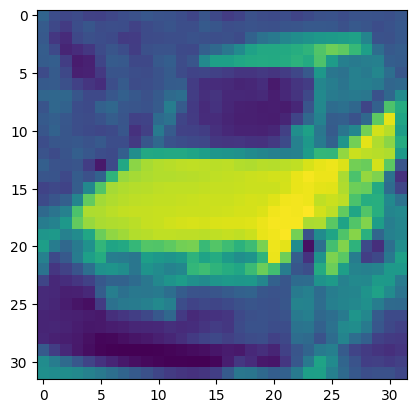

In [ ]:
# Convertendo imagens
to_grayscale = Grayscale()
previsores_treinamento = to_grayscale(X_treinamento)
previsores_teste = to_grayscale(X_teste)
previsores_treinamento = np.array(previsores_treinamento)
previsores_teste = np.array(previsores_teste)
plt.imshow(previsores_treinamento[46])

In [ ]:
print(previsores_treinamento.shape)
print(previsores_teste.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


### Tratando dados de pixels para uma escala de 0-1

In [ ]:
#Tratando dados de pixels para uma escala de 0-1
previsores_treinamento /= 255
previsores_teste /= 255

### Convertendo classes

In [ ]:
#Convertendo classes
classe_treinamento = to_categorical(y_treinamento, 10)
classe_teste = to_categorical(y_teste, 10)

## Criação de Augumentation

In [ ]:
# Augumentation
gerador_treinamento = ImageDataGenerator(rotation_range=7,
                                         horizontal_flip= True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range=0.2)

gerador_teste = ImageDataGenerator()

base_treinamento = gerador_treinamento.flow(previsores_treinamento, classe_treinamento, batch_size= 128)
base_teste = gerador_teste.flow(previsores_teste, classe_teste, batch_size= 128)

In [ ]:
print(base_treinamento.x.shape)
print(base_teste.x.shape)
print(classe_treinamento.shape)
print(classe_teste.shape)
print(previsores_treinamento.shape)
print(previsores_teste.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)
(50000, 10)
(10000, 10)
(50000, 32, 32, 1)
(10000, 32, 32, 1)
78.125


## Criação da Rede Neural Convolucional

In [ ]:
#Iniciar rede convulacional
def criarRede():
  classificador = Sequential()
  classificador.add(Conv2D(32, (4,4), input_shape=(32,32,1),
                          activation = "relu")) #Criação do mapa de características
  classificador.add(BatchNormalization()) #Normalização dos dados
  classificador.add(MaxPooling2D(pool_size=(2,2))) #Realização do MaxPooling para pegar as principais características


  classificador.add(Conv2D(32, (3,3),strides=2, activation = "relu")) #Criação do mapa de características
  classificador.add(BatchNormalization()) #Normalização dos dados
  classificador.add(MaxPooling2D(pool_size=(2,2))) #Realização do MaxPooling para pegar as principais características


  classificador.add(Flatten()) #Normalizar para uma entrada comum na rede neural densa
  classificador.add(Dense(units=128, activation = "relu" ))
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units=256, activation = "relu" ))
  classificador.add(Dropout(0.2))
  classificador.add(Dense(units=10, activation = "softmax" ))
  classificador.compile(loss = 'categorical_crossentropy',
                        optimizer = 'adam', metrics = ['accuracy'])
  return classificador

In [ ]:
# Labels do CIFAR 10
labels = 'airplane automobile bird cat deer dog frog horse ship truck'.upper().split(' ')
labels

['AIRPLANE',
 'AUTOMOBILE',
 'BIRD',
 'CAT',
 'DEER',
 'DOG',
 'FROG',
 'HORSE',
 'SHIP',
 'TRUCK']

## Inicialização de treinamentos e testes

### Instanciando rede neural

In [ ]:
classificador = criarRede()

### Usando dados originais em escala de cinza

In [ ]:
# Usando dados originais em escala de cinza
classificador.fit(previsores_treinamento, classe_treinamento, batch_size= 128, epochs = 20)
precisao = classificador.evaluate(previsores_teste, classe_teste)
print(f'Precisão usando dados originais em escala de cinza: {precisao}')

Epoch 1/20
391/391 [==============================] - 3s 7ms/step - loss: 0.6579 - accuracy: 0.7658
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.6465 - accuracy: 0.7699
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.6373 - accuracy: 0.7726
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 0.6280 - accuracy: 0.7759
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 0.6195 - accuracy: 0.7787
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.6138 - accuracy: 0.7802
Epoch 7/20
391/391 [==============================] - 4s 9ms/step - loss: 0.5995 - accuracy: 0.7858
Epoch 8/20
391/391 [==============================] - 2s 5ms/step - loss: 0.5961 - accuracy: 0.7858
Epoch 9/20
391/391 [==============================] - 2s 5ms/step - loss: 0.5952 - accuracy: 0.7857
Epoch 10/20
391/391 [==============================] - 2s 5ms/step - loss: 0.5813 - accuracy: 0.7928

1/1 [==============================] - 0s 142ms/step
Previsão: 0 Label Prevista: AIRPLANE
Classe real: 0 Label Real: AIRPLANE
Resultado: ACERTOU


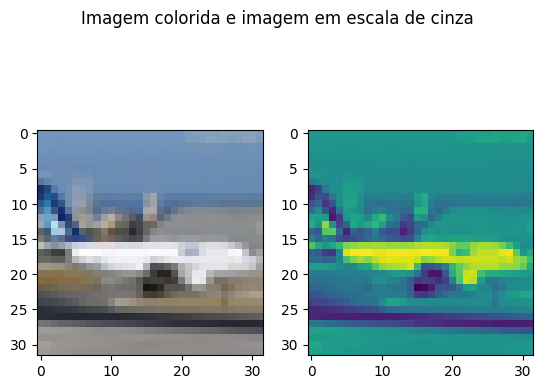

In [ ]:
index =  90
imagem_teste = np.expand_dims(previsores_teste[index], axis =0)
previsao = classificador.predict(imagem_teste)
previsao = np.argmax(previsao, axis=-1)[0]
classe_real = preds_classes = np.argmax(classe_teste[index], axis=-1)
fig, axs = plt.subplots(1,2)
fig.suptitle('Imagem colorida e imagem em escala de cinza')
axs[0].imshow(X_teste[index])
axs[1].imshow(previsores_teste[index])
resultado = 'ACERTOU' if previsao==classe_real else 'ERROU'
print(f'Previsão: {previsao} Label Prevista: {labels[previsao]}\nClasse real: {classe_real} Label Real: {labels[classe_real]}\nResultado: {resultado}')

### Validação Cruzada

In [ ]:
#Validação cruzada
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = seed)

resultados = []

classificador = criarRede()
for index_treinamento, index_teste in kfold.split(previsores_treinamento,
                                                       np.zeros(shape = (classe_treinamento.shape[0], 1))):
  classificador.fit(previsores_treinamento[index_treinamento], classe_treinamento[index_treinamento],
                    batch_size= 128, epochs = 15)
  precisao = classificador.evaluate(previsores_treinamento[index_teste], classe_treinamento[index_teste])
  resultados.append(precisao[1])

Epoch 1/15
352/352 [==============================] - 4s 6ms/step - loss: 1.7260 - accuracy: 0.3792
Epoch 2/15
352/352 [==============================] - 2s 7ms/step - loss: 1.3860 - accuracy: 0.5095
Epoch 3/15
352/352 [==============================] - 2s 5ms/step - loss: 1.2246 - accuracy: 0.5713
Epoch 4/15
352/352 [==============================] - 2s 5ms/step - loss: 1.1317 - accuracy: 0.6021
Epoch 5/15
352/352 [==============================] - 2s 5ms/step - loss: 1.0628 - accuracy: 0.6290
Epoch 6/15
352/352 [==============================] - 2s 5ms/step - loss: 1.0084 - accuracy: 0.6499
Epoch 7/15
352/352 [==============================] - 2s 5ms/step - loss: 0.9575 - accuracy: 0.6657
Epoch 8/15
352/352 [==============================] - 2s 6ms/step - loss: 0.9220 - accuracy: 0.6785
Epoch 9/15
352/352 [==============================] - 2s 7ms/step - loss: 0.8874 - accuracy: 0.6896
Epoch 10/15
352/352 [==============================] - 2s 5ms/step - loss: 0.8572 - accuracy: 0.6987

In [ ]:
resultados =  np.array(resultados)
mediaCross  = resultados.mean()
print(mediaCross)

0.780239999294281


1/1 [==============================] - 0s 28ms/step
Previsão: 6 Label Prevista: FROG
Classe real: 6 Label Real: FROG
Resultado: ACERTOU


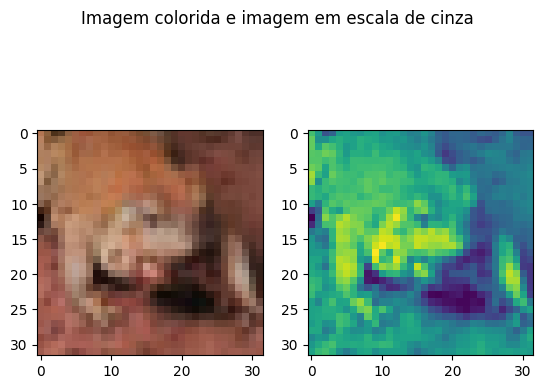

In [ ]:
index =  5
imagem_teste = np.expand_dims(previsores_teste[index], axis =0)
previsao = classificador.predict(imagem_teste)
previsao = np.argmax(previsao, axis=-1)[0]
classe_real = preds_classes = np.argmax(classe_teste[index], axis=-1)
fig, axs = plt.subplots(1,2)
fig.suptitle('Imagem colorida e imagem em escala de cinza')
axs[0].imshow(X_teste[index])
axs[1].imshow(previsores_teste[index])
resultado = 'ACERTOU' if previsao==classe_real else 'ERROU'
print(f'Previsão: {previsao} Label Prevista: {labels[previsao]}\nClasse real: {classe_real} Label Real: {labels[classe_real]}\nResultado: {resultado}')

### Treinamento e teste com Augumentation

In [ ]:
classificador = criarRede()
classificador.fit(base_treinamento,
                  steps_per_epoch= base_treinamento.x.shape[0]/base_treinamento.batch_size,
                  epochs = 20,
                  validation_data=base_teste,
                  validation_steps=base_teste.x.shape[0]/base_teste.batch_size)
precisao = classificador.evaluate(base_teste.x, base_teste.y)
print(f'Precisão usando dados originais em escala de cinza: {precisao}')

Epoch 1/20
390/390 [==============================] - 20s 46ms/step - loss: 1.8033 - accuracy: 0.3537 - val_loss: 2.2590 - val_accuracy: 0.2594
Epoch 2/20
390/390 [==============================] - 18s 46ms/step - loss: 1.5428 - accuracy: 0.4532 - val_loss: 1.8377 - val_accuracy: 0.3968
Epoch 3/20
390/390 [==============================] - 17s 43ms/step - loss: 1.4151 - accuracy: 0.5024 - val_loss: 1.7000 - val_accuracy: 0.4285
Epoch 4/20
390/390 [==============================] - 17s 44ms/step - loss: 1.3217 - accuracy: 0.5364 - val_loss: 1.2809 - val_accuracy: 0.5616
Epoch 5/20
390/390 [==============================] - 20s 51ms/step - loss: 1.2585 - accuracy: 0.5623 - val_loss: 1.3218 - val_accuracy: 0.5426
Epoch 6/20
390/390 [==============================] - 19s 48ms/step - loss: 1.2075 - accuracy: 0.5771 - val_loss: 1.3599 - val_accuracy: 0.5599
Epoch 7/20
390/390 [==============================] - 18s 46ms/step - loss: 1.1686 - accuracy: 0.5903 - val_loss: 1.2360 - val_accuracy:

1/1 [==============================] - 0s 18ms/step
Previsão: 9 Label Prevista: TRUCK
Classe real: 9 Label Real: TRUCK
Resultado: ACERTOU


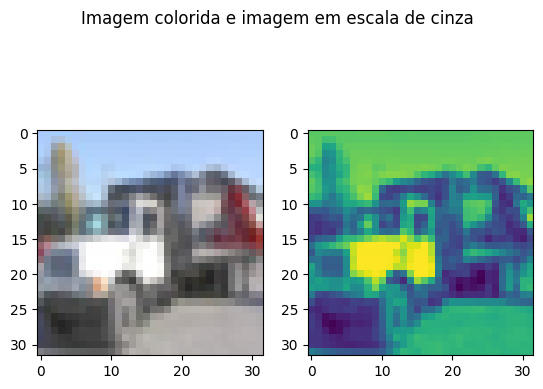

In [ ]:
index =  45
imagem_teste = np.expand_dims(previsores_teste[index], axis =0)
previsao = classificador.predict(imagem_teste)
previsao = np.argmax(previsao, axis=-1)[0]
classe_real = preds_classes = np.argmax(classe_teste[index], axis=-1)
fig, axs = plt.subplots(1,2)
fig.suptitle('Imagem colorida e imagem em escala de cinza')
axs[0].imshow(X_teste[index])
axs[1].imshow(previsores_teste[index])
resultado = 'ACERTOU' if previsao==classe_real else 'ERROU'
print(f'Previsão: {previsao} Label Prevista: {labels[previsao]}\nClasse real: {classe_real} Label Real: {labels[classe_real]}\nResultado: {resultado}')